In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import h5py
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
plt.rcParams['font.sans-serif']=['Arial']

In [2]:
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df4=pd.DataFrame()

datasets=['0.8','0.85','0.9','0.95']
for dataset in datasets:
    dir0 = '../'
    dir1 = '{}'.format(dataset)
    dir2 = 'data_{}.h5'.format(dataset)
    with h5py.File(os.path.join(dir0, 'datasets/sim/data_{}.h5'.format(dataset))) as data_mat:
        X = np.array(data_mat['X'])
        Y = np.array(data_mat['Y'])
        X = np.ceil(X).astype(np.int_)
        Y = np.array(Y).astype(np.int_).squeeze()

    adata = sc.AnnData(X)

    RMSE,PCC= [],[]
    methods = ['Raw', 'MAGIC', 'scImpute','ALRA', 'DCA', 'scVI', 'scGraphNE']
    for method in methods:
        print('----------------method: {} ----------------- '.format(method))
        r = np.load(os.path.join(dir0,'results/expression_recovery/{}/result_{}_{}.npz'.format(dataset,dataset,method)))
        rmse = r['rmse'].tolist()
        pcc = r['pcc'].tolist()
        RMSE.append(rmse),PCC.append(pcc)
    df11,df22 = pd.DataFrame(RMSE, index=methods), pd.DataFrame(PCC, index=methods)
    df1,df2 = pd.concat([df1,df11],axis=1),pd.concat([df2,df22],axis=1)

df1 = df1.rename(index={'Raw':'observed'})
df1.columns,df2.columns=datasets,datasets
df1,df2 = df1.T,df2.T
print(df1)
print("------------------------------------------------------------------")
print(df2)

----------------method: Raw ----------------- 
----------------method: MAGIC ----------------- 
----------------method: scImpute ----------------- 
----------------method: ALRA ----------------- 
----------------method: DCA ----------------- 
----------------method: scVI ----------------- 
----------------method: scGraphNE ----------------- 
----------------method: Raw ----------------- 
----------------method: MAGIC ----------------- 
----------------method: scImpute ----------------- 
----------------method: ALRA ----------------- 
----------------method: DCA ----------------- 
----------------method: scVI ----------------- 
----------------method: scGraphNE ----------------- 
----------------method: Raw ----------------- 
----------------method: MAGIC ----------------- 
----------------method: scImpute ----------------- 
----------------method: ALRA ----------------- 
----------------method: DCA ----------------- 
----------------method: scVI ----------------- 
----------------metho

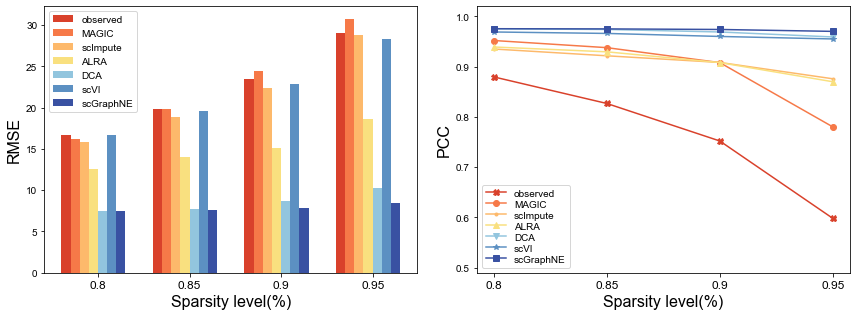

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4.5), constrained_layout=True)
fig.tight_layout(h_pad=2)

barx = np.arange(len(df1))
width = -0.35; wid = 0.1

colors = ['#D9412B', '#F67948', '#FDB96B','#F9E07F','#92C5DE', '#5C90C2','#3951A2','#4F9D9D','#E79796']
for i in range(len(df1.T)):
    axes[0].bar(barx + width, df1.iloc[:, i].values, width=wid, label=df1.columns[i], color=colors[i]) 
    width += wid
xs=[0.8,0.85,0.9,0.95]
x = np.linspace(0,3,4)
axes[0].set_xticks(x)
axes[0].set_xticklabels(xs,fontsize=12)
axes[0].legend(loc="upper left",fontsize=10)
axes[0].set_xlabel('Sparsity level(%)',fontsize=16)
axes[0].set_ylabel('RMSE',fontsize=16)

x=list(df2.index)
MAGIC=df2['MAGIC'].values
DCA=df2['DCA'].values
scVI=df2['scVI'].values
scGraphNE=df2['scGraphNE'].values
scImpute=df2['scImpute'].values
ALRA=df2['ALRA'].values
observed=df2['Raw'].values
xs=[0.8,0.85,0.9,0.95]
x = np.linspace(0,1,4)

axes[1].plot(x,observed,marker='X',label='observed',color='#D9412B')
axes[1].plot(x,MAGIC,marker='o',label='MAGIC',color='#F67948')
axes[1].plot(x,scImpute,marker='.',label='scImpute',color='#FDB96B')
axes[1].plot(x,ALRA,marker='^',label='ALRA',color='#F9E07F')
axes[1].plot(x,DCA,marker='v',label='DCA',color='#92C5DE')
axes[1].plot(x,scVI,marker='*',label='scVI',color='#5C90C2')
axes[1].plot(x,scGraphNE,marker='s',label='scGraphNE',color='#3951A2')
axes[1].legend(loc="lower left",labelspacing=0.2,fontsize=10)
axes[1].set_ylim(0.49,1.02)
axes[1].set_xticks(x)
axes[1].set_xticklabels(xs,fontsize=12)
axes[1].set_xlabel('Sparsity level(%)',fontsize=16)
axes[1].set_ylabel('PCC',fontsize=16)

plt.tight_layout(h_pad=2,w_pad=2)
plt.savefig('../figures/sim.png',dpi=800, bbox_inches='tight')
plt.savefig('../figures/sim.svg', dpi=300, format='svg', bbox_inches='tight')
plt.show()